In [1]:
import pandas as pd

# Original Dataset

In [4]:
# Import netflix data
"""
Kaggle link: https://www.kaggle.com/datasets/shivamb/netflix-shows

Dataset:
show_id (text_format): Unique ID for every Movie / Tv Show
type (text_format): Identifier - A Movie or TV Show
title (text_format): Title of the Movie / Tv Show
director (text_format): Director of the Movie
cast (text_format): Actors involved in the movie / show
country (calendar_today): Country where the movie / show was produced
date_added (grid_3x3): Date it was added on Netflix
release_year (text_format): Actual Release year of the move / show
rating (text_format): TV Rating of the movie / show
duration (text_format): Total Duration - in minutes or number of seasons
listed_in (text_format): Genere
description (text_format): The summary description
"""
netflix_data = pd.read_csv('datasets/netflix.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<AxesSubplot:>

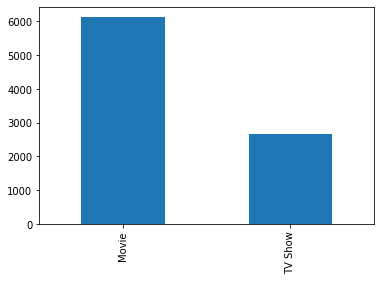

In [68]:
# We may get just one type
netflix_data.type.value_counts().plot.bar()

In [24]:
netflix_data.director.value_counts()

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
                          ..
David Silberg              1
Mark Zwonitzer             1
Amman Abbasi               1
Clay Porter                1
Dan Fraga, William Lau     1
Name: director, Length: 4528, dtype: int64

In [36]:
# We should separate the list
netflix_data.cast.value_counts()

David Attenborough                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                       14
Samuel West                                                                                                                                                   10
Jeff Dunham                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                   6
                                                                                                                                                              ..
Judah Lewis, Jenna Ortega, Emily A

In [41]:
# Country is very unbalanced, maybe group by US, NOT_US
netflix_data.country.value_counts().head(20)

United States                    2818
India                             972
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Germany                            67
Name: country, dtype: int64

In [27]:
# Maybe get just the year
netflix_data.date_added.value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
February 14, 2021      1
October 31, 2015       1
 April 4, 2017         1
 December 1, 2018      1
March 7, 2017          1
Name: date_added, Length: 1767, dtype: int64

In [33]:
# We should it group by somehow, maybe by decade, groups of 5 years or just 2000-
netflix_data.release_year.value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [35]:
# What is it?
netflix_data.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [40]:
# Group by range of minutes for movies, and 1 season or 2+ seasons for TV Shows
netflix_data.duration.value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
97 min        146
             ... 
214 min         1
205 min         1
253 min         1
201 min         1
200 min         1
Name: duration, Length: 220, dtype: int64

In [43]:
# We should separate the list
netflix_data.listed_in.value_counts()

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Children & Family Movies, Comedies, LGBTQ Movies      1
TV Action & Adventure, TV Dramas, Teen TV Shows       1
Docuseries, Science & Nature TV, TV Dramas            1
Reality TV, TV Action & Adventure, TV Mysteries       1
TV Comedies, TV Sci-Fi & Fantasy, Teen TV Shows       1
Name: listed_in, Length: 514, dtype: int64

In [45]:
# Bag of words?
netflix_data.description.value_counts()

Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
From controversial cartoonist to powerful Mumbai politician, this biopic maps the meteoric rise of far-right Shiv Sena party founder, Bal Thackeray.         2
                                                                                                                                                            ..
Catching the eye of a wealthy gentleman, spunk

## GRAPH

'show' = 'show_id', 'title'

'show' -> typed as -> 'type'

'show' -> categorized as -> 'listed_in'

'show' -> directed by -> 'director' 

'show' -> release on -> 'release_year'

'show' -> lasts for -> 'duration'

'show' -> produced in -> 'country' 

'show' -> interpreted by -> 'cast'

-- 'show' -> add on netflix on -> 'date_added'

-- 'show' -> rated as -> 'rating'

-- 'show' -> described as -> 'description'

In [156]:
def transform_categories_in_indexes(dataset):
    list_cols = dataset.columns
    next_index = 0
    for col in list_cols:
        categories = dataset.loc[:, col].unique()
        indexes = range(next_index, next_index+len(categories))
        dataset.update(dataset.loc[:, col].replace(categories, indexes))
        next_index = indexes[-1] + 1
    return dataset

In [177]:
def create_type_file(dataset, file_name):
    with open(f'{file_name}.type','w') as file:
        list_cols = dataset.columns
        for i in range(len(list_cols)):
            n_rows = dataset[list_cols[i]].nunique()
            for j in range(n_rows):
                file.write(str(i))
                file.write('\n')

In [178]:
# This method only works if only column 0 has connections with other layers
def create_ncol_file(dataset, file_name):
    with open(f'{file_name}.ncol','w') as file:
        # for each row
        base_column = 'show_id'
        for index, row in dataset.iterrows():
            # for each column that is not show_id, there is a connection with show_id
            list_cols = dataset.columns
            for col in list_cols[1:]:
                file.write(f"{row[base_column]} {row[col]} 1")
                file.write('\n')

In [179]:
# This method only works for complete bipartite networks 
def create_Cbipartite_membership_file(dataset, file_name):
    with open(f'{file_name}.membership','w') as file:
        other_column = dataset.columns[1]
        ## Layer 0 - show_id
        for index, row in dataset.iterrows():
            file.write(f"{row[1]}")
            file.write('\n')

        ## Layer 1 - only works if there is no communities there
        for i in range (dataset[other_column].nunique()):
            file.write(str(i))
            file.write('\n')

In [180]:
def generate_all_files(dataset, filename, is_Cbipartite):
    bipartite1_transformed = transform_categories_in_indexes(dataset)
    create_type_file(bipartite1_transformed, file_name=filename)
    create_ncol_file(bipartite1_transformed, file_name=filename)
    if is_Cbipartite:
        create_Cbipartite_membership_file(bipartite1_transformed, file_name=filename)

# Bipartite network

## movie, type
it should be straightforward 2 communities

In [187]:
bipartite1 = netflix_data[['show_id', 'type']]
filename = 'g_bipartite-1'
filepath = f'../outputs/output_bnoc/{filename}/{filename}'
generate_all_files(bipartite1, filepath, is_Cbipartite=True)

/usr/local/Cellar/jupyterlab/2.2.9/libexec/lib/python3.9/site-packages/pandas/core/frame.py:6599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)
